In [1]:
import pickle 

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

%matplotlib inline

In [8]:
with open("trajectory.pkl","rb") as handle:
    trajectory = pickle.load(handle)


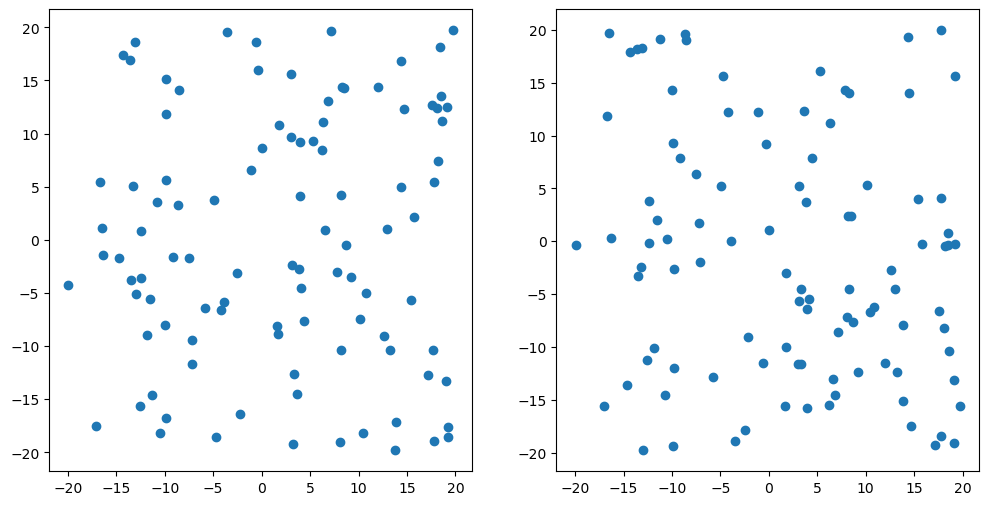

In [9]:
fig, ax = plt.subplots(1,2,figsize = (12,6))

scats = []

R = trajectory['r'][0]

scats.append( ax[0].scatter(R[:, 0], R[:, 1]) )
scats.append( ax[1].scatter(R[:, 0], R[:, 2]) )

def animate(i):
    R = trajectory['r'][i]

    scats[0].set_offsets(
        np.vstack([R[:, 0], R[:, 1]]).T
    )
    scats[1].set_offsets(
        np.vstack([R[:, 0], R[:, 2]]).T
    )
    
ani = animation.FuncAnimation(fig, func=animate, frames= len(trajectory["steps"]))

ani.save('trajectory.html', writer=animation.HTMLWriter(fps= 1))

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import pandas as pd


a = np.random.rand(2000, 3)*10
t = np.array([np.ones(100)*i for i in range(20)]).flatten()
df = pd.DataFrame({"time": t ,"x" : a[:,0], "y" : a[:,1], "z" : a[:,2]})

def update_graph(num):
    data=df[df['time']==num]
    graph._offsets3d = (data.x, data.y, data.z)
    title.set_text('3D Test, time={}'.format(num))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')

data=df[df['time']==0]
graph = ax.scatter(data.x, data.y, data.z)

ani = matplotlib.animation.FuncAnimation(fig, update_graph, frames=40, 
                               interval=40,blit=False)

plt.show()

In [ ]:
df

In [ ]:
data=df[df['time']==2]
data

In [ ]:
list(np.real(trajectory[1][0]))